In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


## Fase 1: Exploración y Limpieza

### 1.1 Exploración inicial

In [5]:
#Ahora leemos los dos .csv
df_activity = pd.read_csv("Customer Flight Activity.csv")
df_cliente_leal = pd.read_csv("Customer Loyalty History.csv")

In [6]:
#Llamo a las columnas para ver cuales tienen en comun
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [7]:
df_cliente_leal.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [8]:
#Primero unimos los dos DataFrame
df_clientes = df_activity.merge(df_cliente_leal, on= 'Loyalty Number', how='outer')

In [9]:
# Veremos lo que tiene la union del dataframe
df_clientes.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [10]:
df_clientes.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
405619,999986,2018,7,15,0,15,1995,199.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405620,999986,2018,9,0,0,0,0,0.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405621,999986,2018,10,6,0,6,708,70.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405622,999986,2018,11,11,4,15,2040,204.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405623,999986,2018,12,0,0,0,0,0.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [11]:
df_clientes.sample(4)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
60609,236129,2017,9,0,0,0,0,0.0,0,0,...,Doctor,57773.0,Married,Star,2563.39,Standard,2015,9,NaN,NaN
340516,853603,2017,5,1,0,1,405,40.0,0,0,...,Bachelor,61302.0,Divorced,Star,2876.82,Standard,2014,2,NaN,NaN
351068,877034,2018,9,0,0,0,0,0.0,0,0,...,College,NaN,Divorced,Star,6707.99,Standard,2018,11,NaN,NaN
242595,637760,2017,5,0,0,0,0,0.0,0,0,...,Master,120956.0,Divorced,Star,2300.69,Standard,2015,5,NaN,NaN


In [12]:
# Quiero ver cuantas filas y columnas tiene el nuevo dataframe
df_clientes.shape

(405624, 25)

In [13]:
# Quiero ver el tipo de datos que tiene cada columna
df_clientes.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [14]:
#Para ver la información detallada del dataframe
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [ ]:
#La columna código postal se puesta como tipo "object" cuando suelen ser "int", veamos que tiene dentro.
print (df_clientes['Postal Code'])

0         T9G 1W3
1         T9G 1W3
2         T9G 1W3
3         T9G 1W3
4         T9G 1W3
           ...   
405619    K1F 2R2
405620    K1F 2R2
405621    K1F 2R2
405622    K1F 2R2
405623    K1F 2R2
Name: Postal Code, Length: 405624, dtype: object


In [ ]:
# Si queremos ver la mediana, los percentiles y la desviación estandar, podemos usar describe.
df_clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


In [17]:
#Quiero ver las columnas que coinciden con el tipo de dato que tiene

In [18]:
# columnas con numeros enteros
df_clientes.select_dtypes(include=[int])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Redeemed,Dollar Cost Points Redeemed,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,0,0,2016,8
1,100018,2017,2,2,2,4,1320,0,0,2016,8
2,100018,2018,10,6,4,10,3110,385,31,2016,8
3,100018,2017,4,4,0,4,924,0,0,2016,8
4,100018,2017,5,0,0,0,0,0,0,2016,8
...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,2018,7,15,0,15,1995,0,0,2018,2
405620,999986,2018,9,0,0,0,0,0,0,2018,2
405621,999986,2018,10,6,0,6,708,0,0,2018,2
405622,999986,2018,11,11,4,15,2040,0,0,2018,2


In [19]:
#Columnas con numeros decimales
df_clientes.select_dtypes(include=[float])

,Points Accumulated,Salary,CLV,Cancellation Year,Cancellation Month
0,152.0,92552.0,7919.20,NaN,NaN
1,132.0,92552.0,7919.20,NaN,NaN
2,311.0,92552.0,7919.20,NaN,NaN
3,92.0,92552.0,7919.20,NaN,NaN
4,0.0,92552.0,7919.20,NaN,NaN
...,...,...,...,...,...
405619,199.0,46594.0,8257.01,NaN,NaN
405620,0.0,46594.0,8257.01,NaN,NaN
405621,70.0,46594.0,8257.01,NaN,NaN
405622,204.0,46594.0,8257.01,NaN,NaN


In [20]:
# columnas de tipo texto
df_clientes.select_dtypes(include=[object])

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
1,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
2,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
3,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
4,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
...,...,...,...,...,...,...,...,...,...
405619,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion
405620,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion
405621,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion
405622,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion


In [21]:
df_clientes['Gender'].count()

np.int64(405624)

In [22]:
df_clientes['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df_clientes['Gender'].nunique()

2

In [24]:
df_clientes['Gender'].value_counts()

Gender
Female    203640
Male      201984
Name: count, dtype: int64

In [ ]:
#¿Qué pasa si quiero ver los valores únicos de toda la columna?. Usamos upper para que la columna empiece con mayuscula

for columns in df_clientes:
    print(f'Estos son los valores unicos de la columna {columns.upper()}')
    print(df_clientes[columns].unique())
    print('\n---------------------------\n')    #separan los resultados

Estos son los valores unicos de la columna LOYALTY NUMBER
[100018 100102 100140 ... 999940 999982 999986]

---------------------------

Estos son los valores unicos de la columna YEAR
[2017 2018]

---------------------------

Estos son los valores unicos de la columna MONTH
[ 1  2 10  4  5  6  7  9  8 11 12  3]

---------------------------

Estos son los valores unicos de la columna FLIGHTS BOOKED
[ 3  2  6  4  0 10  9 13  1 14  7  5 11 17  8 15 12 16 20 18 19 21]

---------------------------

Estos son los valores unicos de la columna FLIGHTS WITH COMPANIONS
[ 0  2  4  1  5  3  7  6  8  9 10 11]

---------------------------

Estos son los valores unicos de la columna TOTAL FLIGHTS
[ 3  4 10  0  5 13 15  6 14  1 17  7 16 11 23  9  8 18 19 12 21  2 20 22
 28 26 29 27 25 24 30 31 32]

---------------------------

Estos son los valores unicos de la columna DISTANCE
[1521 1320 3110 ... 4162 1979 5676]

---------------------------

Estos son los valores unicos de la columna POINTS ACCUMULAT

In [26]:
#Si quiero saber cuantos duplicados hay en total, podemos hacer:
df_clientes.duplicated().sum()

np.int64(1864)

In [27]:
#Quiero saber cuantos valores nulos hay en total
df_clientes.isnull().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

In [ ]:
# Qué podemos hacer si queremos ver el porcentaje total de nulos que existen en el df?

porcentaje_nulos = df_clientes.isnull().sum()/df_clientes.shape[0]*100
porcentaje_nulos

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

### 1.2 Limpieza de Datos

In [29]:
#Nos aseguramos de que no hayan espacios innecesarios
df_clientes.columns = df_clientes.columns.str.strip()

In [30]:
df_clientes.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [31]:
#Eliminamos "," innecesarias
for column in df_clientes.columns:
    if df_clientes[column].dtype == "object":
        df_clientes[column] = df_clientes[column].str.replace(",", "", regex=True)

In [32]:
#Cambiamos el tipo de dato de las columnas 'distance'y point accummulated
df_clientes['Distance'] = df_clientes['Distance'].astype(float)
df_clientes['Points Accumulated'] = df_clientes['Points Accumulated'].astype(int)

In [33]:
#Tras limpiar las columnas y modificar los tipos de datos, veremos los duplicados
df_clientes.duplicated().sum()

np.int64(1864)

In [34]:
df_sin_duplicados=df_clientes.drop_duplicates()

In [35]:
#Creamos una variable para las columnas que tienen nulos
columns_null = ['Cancellation Month', 'Cancellation Year', 'Salary']

In [36]:
for column in columns_null:
    print(f'La columna "{column}" es de tipo: {df_sin_duplicados.dtypes[column]}')
    print(f'Su porcentaje de nulos es: {porcentaje_nulos[column]}')
    print('--------------------------------')

La columna "Cancellation Month" es de tipo: float64
Su porcentaje de nulos es: 87.65753505709722
--------------------------------
La columna "Cancellation Year" es de tipo: float64
Su porcentaje de nulos es: 87.65753505709722
--------------------------------
La columna "Salary" es de tipo: float64
Su porcentaje de nulos es: 25.31211170936631
--------------------------------


In [37]:
df_sin_duplicados.loc[:, ['Cancellation Year', 'Cancellation Month']] = df_sin_duplicados[['Cancellation Year', 'Cancellation Month']].fillna('Active')

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8404\1845891792.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Active' 'Active' 'Active' ... 'Active' 'Active' 'Active']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sin_duplicados.loc[:, ['Cancellation Year', 'Cancellation Month']] = df_sin_duplicados[['Cancellation Year', 'Cancellation Month']].fillna('Active')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8404\1845891792.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Active' 'Active' 'Active' ... 'Active' 'Active' 'Active']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sin_duplicados.loc[:, ['Cancellation Year', 'Cancellation Month']] = df_sin_duplicados[['Cancellation Year', 'Cancellation Month']].fillna('Active')


In [38]:
mediana_salario = df_sin_duplicados['Salary'].median()
df_sin_duplicados['Salary'].fillna(mediana_salario, inplace=True)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8404\3149097584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sin_duplicados['Salary'].fillna(mediana_salario, inplace=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8404\3149097584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados['Salary'].fillna(mediana_salario,

In [39]:
# Ahora verificamos si la modificacion se ha realizado correctamente en las tres columnas
df_sin_duplicados['Cancellation Year'].isnull().sum()

np.int64(0)

In [40]:
df_sin_duplicados['Cancellation Month'].isnull().sum()

np.int64(0)

In [41]:
df_sin_duplicados['Salary'].isnull().sum()

np.int64(0)

In [42]:
df_sin_duplicados.to_csv('df_final.csv', index=False)

# Fase 2: Visualización

In [43]:
df_final = pd.read_csv("df_final.csv")

In [44]:
df_final.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [45]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante cada año?
vuelos_mensuales = df_final.groupby(['Year','Month'])['Flights Booked'].sum().reset_index()

In [46]:
vuelos_mensuales

,Year,Month,Flights Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


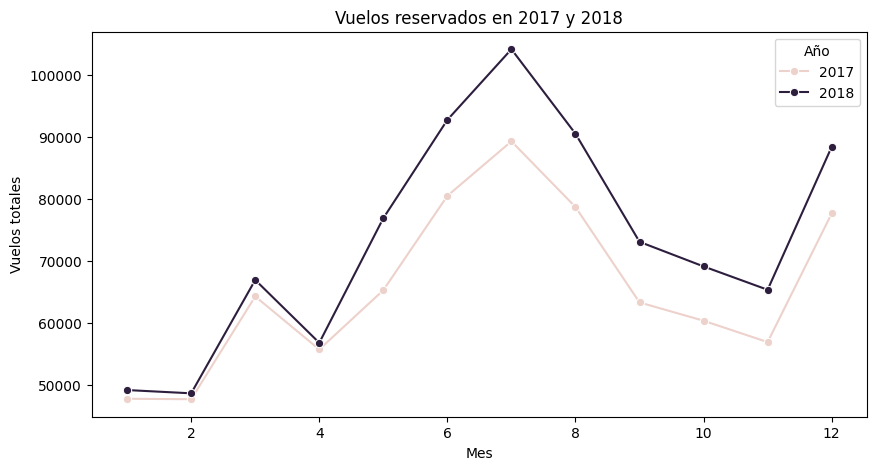

In [67]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=vuelos_mensuales, x="Month", y="Flights Booked", hue="Year", marker="o")
plt.title("Vuelos reservados en 2017 y 2018")
plt.xlabel("Mes")
plt.ylabel("Vuelos totales")
plt.legend(title="Año")
plt.show()

En este primer gráfico podemos ver los vuelos anueles entre 2017 y 2018, apreciandose una distribución muy similiar los primeros cuatro meses de cada año. Entre los meses de verano, podemos ver que ambos años tienen un aumento significativo (llegando al pico), siendo mayor el de 2018. Después de verano podemos ver como los vuelos disminuyen con una tendencia similar para luego tener una recuperacion en las reservas durante el mes de diciembre.

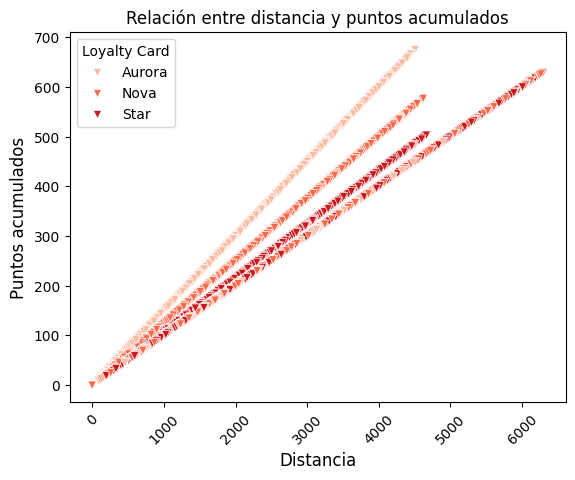

In [68]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
sns.scatterplot(x="Distance", y="Points Accumulated", hue= "Loyalty Card", data=df_final, marker= "v", palette="Reds")
plt.title("Relación entre distancia y puntos acumulados", fontsize=12)
plt.xlabel('Distancia', fontsize=12)
plt.ylabel('Puntos acumulados', fontsize=12)
plt.xticks(rotation=45);


En este segundo gráfico podemos apreciar la relación entre la distancia y los puntos acumulados de los clientes que tienen la 'Loyalty Card'. Podemos observar que, la tendencia entre ambos datos es positiva, ya que a mayor distancia, mayor será la acumulación de puntos para los clientes


In [65]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado? Es decir, poder ver cuántos clientes hay en cada provincia.
# usamos nunique para saber las personas que han viajado, sin que se repitan por su id de loyalty
distribucion_clientes = df_final.groupby('Province')['Loyalty Number'].nunique().sort_values(ascending=False).reset_index()
distribucion_clientes

,Province,Loyalty Number
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


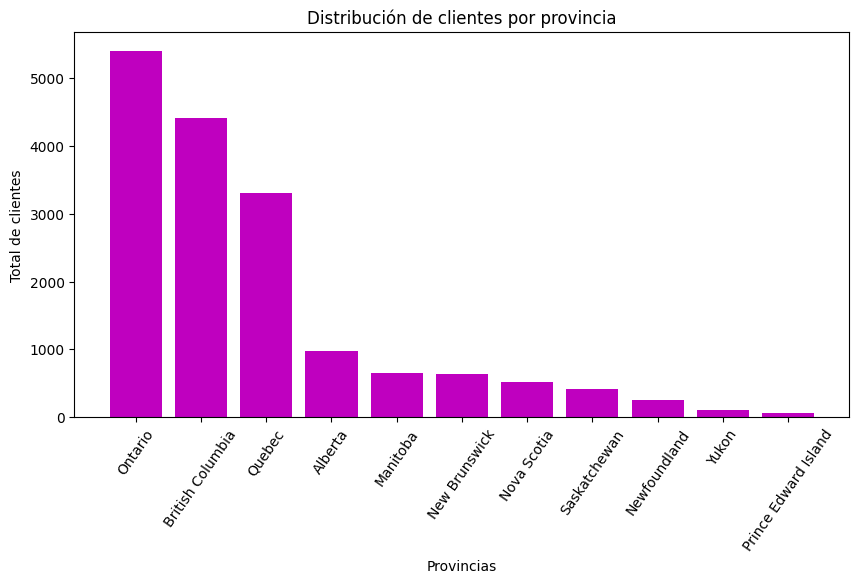

In [66]:
plt.figure(figsize=(10, 5))
plt.bar(x='Province', height='Loyalty Number', data=distribucion_clientes, color='m')
plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincias')
plt.ylabel('Total de clientes')
plt.xticks(rotation=55)
plt.show()

Este gráfico distribuye visualmente la base de clientes en tres provincias principales: Ontario lidera con la mayor cantidad, seguida de cerca por British Columbia y Quebec. Estas tres provincias albergan la mayor parte de la clientela

In [51]:
# 4. Compara el salario promedio por nivel educativo
salario_promedio = df_final.groupby('Education')['Salary'].mean().reset_index().sort_values(by='Salary', ascending=False)
salario_promedio

,Education,Salary
2,Doctor,178403.675202
4,Master,103734.523724
1,College,73479.000000
0,Bachelor,72473.471154
3,High School or Below,61019.926143


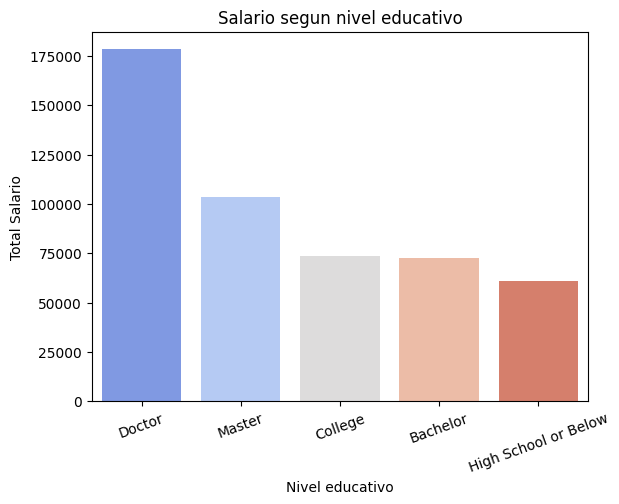

In [73]:
sns.barplot(x="Education", y= "Salary", hue="Education", legend=False, data=salario_promedio, palette="coolwarm")
plt.title('Salario segun nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Total Salario')
plt.xticks(rotation=20)
plt.show()

En este cuarto gráfico podemos ver la relacion entre el nivel educativo y el salario, mostrandonos que a mayor nivel educativo, mayor será el salario. 
Los clientes que tienen un doctorado suelen ser las personas con un salario superior al resto, estando casi un 25€ por encima de los que tienen un master.

In [53]:
# 5. ¿Cuál es el porcentaje de clientes por cada tipo de tarjeta de fidelidad?
tarjeta_fidelidad= df_final.groupby('Loyalty Card')['Loyalty Number'].nunique()
tarjeta_fidelidad

Loyalty Card
Aurora    3429
Nova      5671
Star      7637
Name: Loyalty Number, dtype: int64

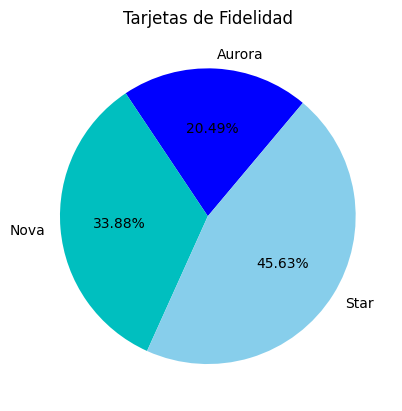

In [54]:
plt.pie(x=tarjeta_fidelidad.values,labels=tarjeta_fidelidad.index, autopct='%1.2f%%', startangle=50, colors=['b','c','skyblue'])
plt.title('Tarjetas de Fidelidad')
plt.show()

En este quinto gráfico podemos observas los tres tipos de tarjetas de fidelidad que existen. Siendo la "Star card" la más poular, ya que la tienen el 45.63% de los clientes; seguida por la "Nova card" y "Aurora card"

In [55]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género? Es decir, una gráfica donde vea a mis clientes
# separados por la categoría de estado civil y que en cada categoría vea cuáles son hombres y cuales mujeres. 

clientes_ecg= df_final.groupby(['Marital Status', 'Gender'])['Loyalty Number'].nunique().reset_index()
clientes_ecg

,Marital Status,Gender,Loyalty Number
0,Divorced,Female,1269
1,Divorced,Male,1249
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212


Text(0.5, 0, 'Marital status')

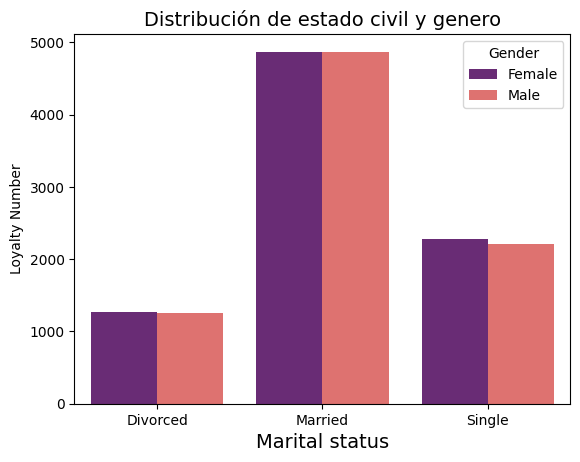

In [56]:
sns.barplot(x='Marital Status', y='Loyalty Number', hue='Gender', data=clientes_ecg, palette='magma')
plt.title('Distribución de estado civil y genero', fontsize=14)
plt.xlabel('Marital status', fontsize=14)

Este último gráfico muestra la distribución de clientes por estado civil y género, revelando una clara predominancia de clientes casados tanto en hombres como en mujeres. Se observa que el número de clientes casados supera significativamente a los solteros y divorciados en ambos géneros. Además, la distribución entre hombres y mujeres es muy similar en cada categoría de estado civil, sin diferencias notables entre ellos.